<a href="https://colab.research.google.com/github/LARP28/SIM_YAC_ROMAN_UPSE2023/blob/main/CODIGO_Comparacion_solucion_real%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simulador ecuacion de la difusividad 
import numpy as np
import math
L=1000 #distancia total 
dx=50 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inical de Presiones 
print(P01)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [2]:
PYac=1000
PFrontd=0 #Frontera derecha
PFronti=0 #Frontera izquierda
Tiempo=400000
DT=1000
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [ ]:
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
print(PXX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
P01

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:

P01=PYac*np.sin(math.pi*Distance/L)
P01[0]=PFronti
P01[len(P01)-1]=PFrontd
P0in=P01 #Condicion inicial 
Pdt=P01 #Vector de resultados dt
t=DT #primera interaccion

In [ ]:
P0in


array([   0.        ,  156.43446504,  309.01699437,  453.99049974,
        587.78525229,  707.10678119,  809.01699437,  891.00652419,
        951.0565163 ,  987.6883406 , 1000.        ,  987.6883406 ,
        951.0565163 ,  891.00652419,  809.01699437,  707.10678119,
        587.78525229,  453.99049974,  309.01699437,  156.43446504,
          0.        ])

In [ ]:
Preal=np.ones_like(PXX)
Preal.shape
P0in.shape

(21,)

In [ ]:
Preal.shape[1]

21

In [ ]:
#Calculo real
from mpmath import mp
def Prealsum2(alpha,t,x,L,Pini):
  sumpexc=0
  Pexct=Pini*np.sin(math.pi*x/L)*mp.exp(-(alpha**2*math.pi**2)*t/(L**2))
  return Pexct

In [ ]:
Pexct=Prealsum2(1,10,500,1000,1000)
print(Pexct)

999.901308826284


In [ ]:
# Ecuacion de la difusividad solucion Real 
Preal=np.ones_like(PXX)
Preal[0]=P0in
for j in range(0,Preal.shape[0]-1):
  for i in range(0,Preal.shape[1]-1):
      if i==0:
        Preal[j][i]=P0in[0]
      elif i==Preal.shape[1]-1:
        Preal[j][i]=P0in[Preal.shape[1]-1]
      else:
        k=1
        Preal[j][i]=Prealsum2(1,(j+1)*DT,(i+1)*dx,L,1000)


In [ ]:
# Ecuacion de la difusividad solucion Real 
Preal[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [ ]:
def Presdt(P1,P2,P3,deltat,deltax):
  return(((round(P1,7)-2*round(P2,7)+round(P3,7))/(deltax*deltax))*deltat)+round(P2,7) 


In [ ]:
PXX[0]=P01
P0in=P01

In [ ]:

while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    PXX[math.floor(t/DT)]=Pdt
    t=t+DT
    P0in=Pdt
   


In [ ]:
PXX


array([[0.00000000e+00, 1.56434465e+02, 3.09016994e+02, ...,
        3.09016994e+02, 1.56434465e+02, 0.00000000e+00],
       [0.00000000e+00, 1.54893691e+02, 3.05357075e+02, ...,
        3.02454052e+02, 1.52268514e+02, 0.00000000e+00],
       [0.00000000e+00, 1.53121568e+02, 3.01542055e+02, ...,
        2.96021507e+02, 1.48862306e+02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.45378580e-01, 4.80742180e-01, ...,
        4.21427220e-01, 2.11591540e-01, 0.00000000e+00],
       [0.00000000e+00, 2.41372600e-01, 4.72893720e-01, ...,
        4.14547080e-01, 2.08137140e-01, 0.00000000e+00],
       [0.00000000e+00, 2.37432000e-01, 4.65173340e-01, ...,
        4.07779260e-01, 2.04739140e-01, 0.00000000e+00]])

In [ ]:
PXX.shape


(400, 21)

In [ ]:
Distance.shape

(21,)

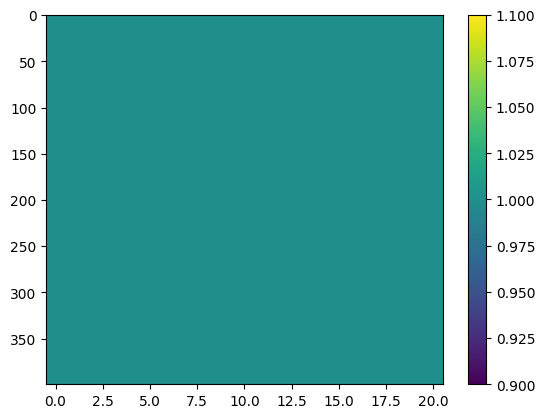

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Preal,aspect='auto')
plt.colorbar()

In [ ]:
PXX[0]

array([   0.        ,  156.43446504,  309.01699437,  453.99049974,
        587.78525229,  707.10678119,  809.01699437,  891.00652419,
        951.0565163 ,  987.6883406 , 1000.        ,  987.6883406 ,
        951.0565163 ,  891.00652419,  809.01699437,  707.10678119,
        587.78525229,  453.99049974,  309.01699437,  156.43446504,
          0.        ])

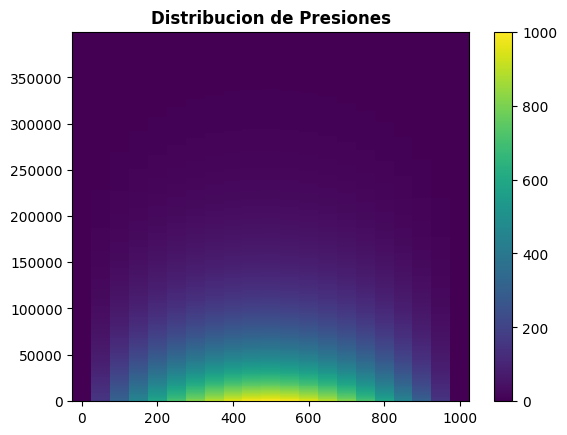

In [ ]:

c = plt.pcolormesh(Distance,VectorTiempo,PXX)
plt.colorbar(c)
 
plt.title('Distribucion de Presiones', fontweight ="bold")
plt.show()

In [ ]:
PXX.shape


(400, 21)

In [ ]:
math.pi

3.141592653589793

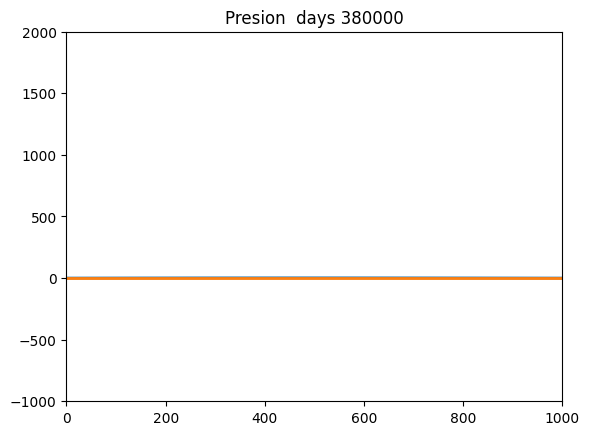

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1000))
ax.set_ylim((-1000, 2000))

line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def init():
    line2.set_data([], [])
    return (line2,)

# animation function. This is called sequentially
def animate(i):
    x = Distance
    y = PXX[i]
    y2=Preal[i]
    line.set_data(x, y)
    line2.set_data(x, y2)
    ax.set(title='Presion  days ' + str(i*DT))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,math.floor(Tiempo/DT),20), interval=200, blit=True)

HTML(anim.to_html5_video())